In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
#graph = LoadConnectome2(ConnFil="../dat/allen-mouse-conn/jw-conn-al1.csv")
graph = LoadConnectome2(ConnFil="../dat/allen-mouse-conn/connectome-log.csv")

## Connectivity of simulated genes

#### 1. Exp Level 

In [3]:
ExpLevel = pd.read_csv("dat/bias/Agg.explevel.Mutcount.bias.csv", index_col="STR")
ExpLevel_Ecount, ExpLevel_cohe = GetConnectivity_Edge(graph, ExpLevel)
DIR = "/Users/jiayao/Work/ASD_Circuits/src/dat/bias/DNV_SM_ExpLevel/"
sim_ecounts = np.empty(0)
sim_cohes = np.empty(0)
for i in range(1000):
    tmp_df = pd.read_csv("{}/dnv_sm.{}.csv".format(DIR, i), index_col="STR")
    tmp_ecount, tmp_cohe = GetConnectivity_Edge(graph, tmp_df)
    sim_ecounts = np.append(sim_ecounts, tmp_ecount)
    sim_cohes = np.append(sim_cohes, tmp_cohe)

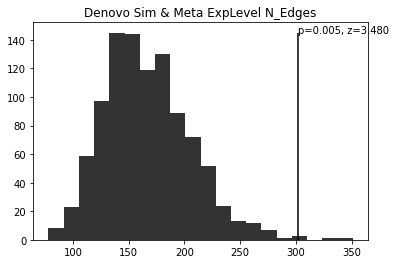

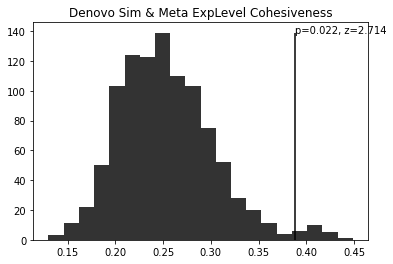

In [4]:
PlotPermutationP(sim_ecounts, ExpLevel_Ecount, title="Denovo Sim & Meta ExpLevel N_Edges")
PlotPermutationP(sim_cohes, ExpLevel_cohe, title="Denovo Sim & Meta ExpLevel Cohesiveness")

In [17]:
5.0 / 23

0.21739130434782608

#### 2. Specificity

In [5]:
AvgZ = pd.read_csv("dat/bias/Agg.avgZ.Mutcount.bias.csv", index_col="STR")
AvgZ_Ecount, AvgZ_cohe = GetConnectivity_Edge(graph, AvgZ)
DIR = "/Users/jiayao/Work/ASD_Circuits/src/dat/bias/DNV_SM_AvgZ/"
sim_ecounts = np.empty(0)
sim_cohes = np.empty(0)
for i in range(1000):
    tmp_df = pd.read_csv("{}/dnv_sm.{}.csv".format(DIR, i), index_col="STR")
    tmp_ecount, tmp_cohe = GetConnectivity_Edge(graph, tmp_df)
    sim_ecounts = np.append(sim_ecounts, tmp_ecount)
    sim_cohes = np.append(sim_cohes, tmp_cohe)

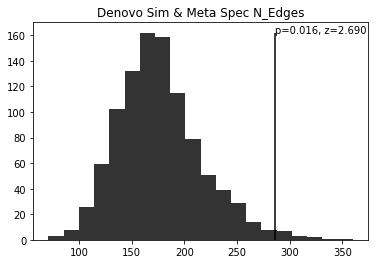

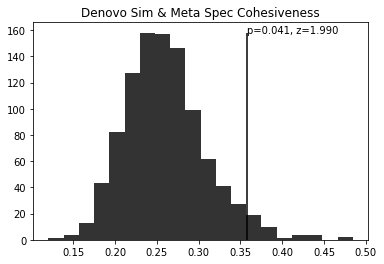

In [6]:
PlotPermutationP(sim_ecounts, AvgZ_Ecount, title="Denovo Sim & Meta Spec N_Edges")
PlotPermutationP(sim_cohes, AvgZ_cohe, title="Denovo Sim & Meta Spec Cohesiveness")

## Edge Permutation Test

#### 1. ExpLevel 

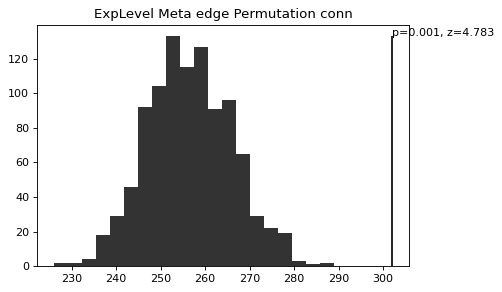

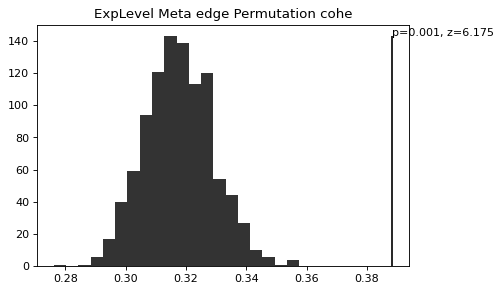

In [11]:
g2_ecounts, g2_cohes = EdgePermutation(graph, ExpLevel, Npermute=1000)  
PlotPermutationP(g2_ecounts, ExpLevel_Ecount, title="ExpLevel Meta edge Permutation conn")
PlotPermutationP(g2_cohes, ExpLevel_cohe, title="ExpLevel Meta edge Permutation cohe")

#### 2. Spec

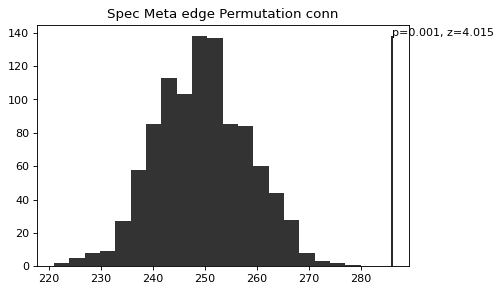

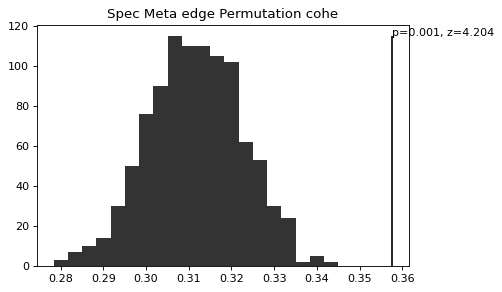

In [12]:
g2_ecounts, g2_cohes = EdgePermutation(graph, AvgZ, Npermute=1000)  
PlotPermutationP(g2_ecounts, AvgZ_Ecount, title="Spec Meta edge Permutation conn")
PlotPermutationP(g2_cohes, AvgZ_cohe, title="Spec Meta edge Permutation cohe")

## Node Permutation test

#### 1. ExpLevel

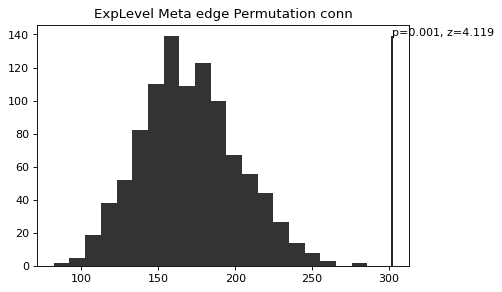

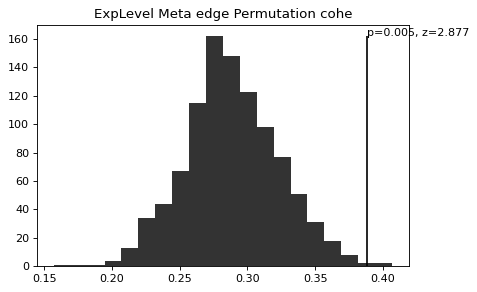

In [14]:
g2_ecounts, g2_cohes = NodePermutation(graph, ExpLevel, Npermute=1000)
PlotPermutationP(g2_ecounts, ExpLevel_Ecount, title="ExpLevel Meta edge Permutation conn")
PlotPermutationP(g2_cohes, ExpLevel_cohe, title="ExpLevel Meta edge Permutation cohe")

#### 2. Spec

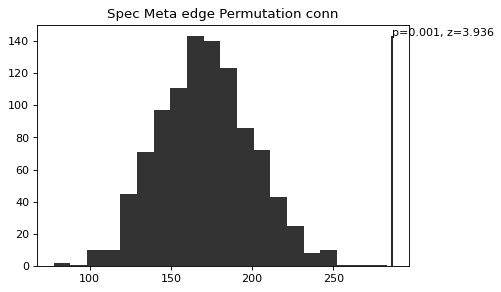

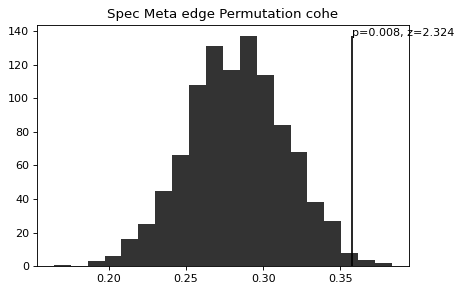

In [16]:
g2_ecounts, g2_cohes = NodePermutation(graph, AvgZ, Npermute=1000)  
PlotPermutationP(g2_ecounts, AvgZ_Ecount, title="Spec Meta edge Permutation conn")
PlotPermutationP(g2_cohes, AvgZ_cohe, title="Spec Meta edge Permutation cohe")

In [18]:
50/213

0.2347417840375587

### Bias vs Cohesiveness

In [ ]:
# asc
asc_zmatch_bias = pd.read_csv("dat/bias/Agg.AvgZ.Mutcount.bias.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, asc_zmatch_bias, title="meta zmatch")
asc_elevel_bias = pd.read_csv("dat/bias/Agg.explevel.Mutcount.bias.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, asc_elevel_bias, title="meta elevel")

In [ ]:
# spark
spark_zmatch_bias = pd.read_csv("dat/bias/asd.spark.zmatch.rank.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, spark_zmatch_bias, title="spark zmatch")
spark_elevel_bias = pd.read_csv("dat/bias/spark.explevel.rank.tsv", index_col="STR")
Bias_vs_Cohesiveness(graph, spark_elevel_bias, title="spark elevel")

In [ ]:
# spark tada
spark_zmatch_bias = pd.read_csv("dat/bias/asd.sparktada.zmatch.rank.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, spark_zmatch_bias, title="spark zmatch")
spark_elevel_bias = pd.read_csv("dat/bias/sparktada.explevel.rank.tsv", index_col="STR")
Bias_vs_Cohesiveness(graph, spark_elevel_bias, title="spark elevel")

In [ ]:
# tada
tada_zmatch_bias = pd.read_csv("dat/bias/asd.tada.zmatch.rank.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, tada_zmatch_bias, title="tada zmatch")
tada_elevel_bias = pd.read_csv("dat/bias/tada.explevel.rank.tsv", index_col="STR")
Bias_vs_Cohesiveness(graph, tada_elevel_bias, title="tada elevel")

In [ ]:
# sibling
sib_zmatch_bias = pd.read_csv("dat/bias/asd.sib.zmatch.rank.csv", index_col="STR")
Bias_vs_Cohesiveness(graph, sib_zmatch_bias, title="sibling zmatch")
sib_elevel_bias = pd.read_csv("dat/bias/sib.explevel.rank.tsv", index_col="STR")
Bias_vs_Cohesiveness(graph, sib_elevel_bias, title="sibling elevel")

In [ ]:
SSC_struct_rank_fil = "dat/bias/Agg.AvgZ.Mutcount.bias.csv"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)

In [ ]:
print(g.vcount(), g.ecount())
print(g2.vcount(), g2.ecount())

In [ ]:
edge_permute_stat = g2.ecount()
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [ ]:
#node_permute_stat = Cohesiveness(g, idx_top50nodes, TopN=1)
node_permute_stat = g2.ecount()
node_null = NodePermutation(g, top_nodes, node_permute_stat, Npermute=100)
PlotPermutationP(node_null, node_permute_stat)

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Random")

In [ ]:
190 / 2450

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Region")

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Percent")

In [ ]:
190/1256

In [ ]:
SSC_struct_rank_fil = "dat/bias/asd.tada.zmatch.rank.csv"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)

In [ ]:
edge_permute_stat = g2.ecount()
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Random")

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Region")

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Percent")

In [ ]:
SSC_struct_rank_fil = "dat/bias/asd.spark.zmatch.rank.csv"
g, top_structs = LoadConnectome(SSC_struct_rank_fil, Bin=True)
top_nodes = g.vs.select(label_in=top_structs)
g2 = g.subgraph(top_nodes)

In [ ]:
edge_permute_stat = g2.ecount()
g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g2_ecounts, edge_permute_stat)

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Random")

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Region")

In [ ]:
NodePermutationBinom(g, 50, g2, Npermute=100, mode="Percent")

In [ ]:
194 / 1315

In [ ]:
STR2REG, REG2STR = LoadSTR2REG()

In [ ]:
for i, row in pd.read_csv(SSC_struct_rank_fil).iterrows():
    str_ = row["STR"]
    print(str_)
    

In [ ]:
jon_ssc_level = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-ssc-1.csv")
jon_ssc_spec = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-ssc-2.csv")
jon_spark_level = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-spark-1.csv")
jon_spark_spec = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-spark-2.csv")
jon_tada_level = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-tada-1.csv")
jon_tada_spec = pd.read_csv("dat/bias/jon_bias/zscore-vs_match-tada-2.csv")

In [ ]:
g, top_structs = LoadConnectome(jon_ssc_level, Bin=True)
ssc_level_top_nodes = g.vs.select(label_in=top_structs)
g_ssc_level = g.subgraph(ssc_level_top_nodes)

In [ ]:
edge_permute_stat = g_ssc_level.ecount()
print(edge_permute_stat)
g_ssc_level_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g_ssc_level_ecounts, edge_permute_stat)

In [ ]:
x, n, r, p = NodePermutationBinom(g, 50, g_ssc_level, Npermute=100, mode="Random")
print("Random %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
x, n, r, p = NodePermutationBinom(g, 50, g_ssc_level, Npermute=100, mode="Random")
print("Region %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
x, n, r, p = NodePermutationBinom(g, 50, g_ssc_level, Npermute=100, mode="Percent")
print("Percent %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))

In [ ]:
g, top_structs = LoadConnectome(jon_spark_level, Bin=True)
spark_level_top_nodes = g.vs.select(label_in=top_structs)
g_spark_level = g.subgraph(spark_level_top_nodes)

In [ ]:
edge_permute_stat = g_spark_level.ecount()
print(edge_permute_stat)
g_spark_level_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
PlotPermutationP(g_spark_level_ecounts, edge_permute_stat)

In [ ]:
x, n, r, p = NodePermutationBinom(g, 50, g_spark_level, Npermute=100, mode="Random")
print("Random %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
x, n, r, p = NodePermutationBinom(g, 50, g_spark_level, Npermute=100, mode="Random")
print("Region %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
x, n, r, p = NodePermutationBinom(g, 50, g_spark_level, Npermute=100, mode="Percent")
print("Percent %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))

In [ ]:
len(set(jon_ssc_level.head(50)["STRUC"].values).intersection(jon_spark_level.head(50)["STRUC"].values))

In [ ]:
def run_connectivity_tests(str_rank, ):
    g, top_structs = LoadConnectome(str_rank, Bin=True)
    top_nodes = g.vs.select(label_in=top_structs)
    g2 = g.subgraph(top_nodes)

    print("Edge Permutation Test")
    edge_permute_stat = g2.ecount()
    print("N edges:", edge_permute_stat)
    g2_ecounts = EdgePermutation(g, top_nodes, edge_permute_stat, Npermute=100)
    PlotPermutationP(g2_ecounts, edge_permute_stat)
    
    print("Node Permutation Test")
    x, n, r, p = NodePermutationBinom(g, 50, g2, Npermute=100, mode="Random")
    print("Random %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
    x, n, r, p = NodePermutationBinom(g, 50, g2, Npermute=100, mode="Random")
    print("Region %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))
    x, n, r, p = NodePermutationBinom(g, 50, g2, Npermute=100, mode="Percent")
    print("Percent %d %d %.4f %.4f %.2e"%(x, n, x/n, r, p))

In [ ]:
run_connectivity_tests(jon_ssc_level)

In [ ]:
jw_ssc_level = pd.read_csv("dat/bias/ssc.explevel.rank.tsv")
jw_spark_level = pd.read_csv("dat/bias/spark.explevel.rank.tsv")
jw_tada_level = pd.read_csv("dat/bias/tada.explevel.rank.tsv")

In [ ]:
run_connectivity_tests(jw_ssc_level)

In [ ]:
run_connectivity_tests(jw_spark_level)

In [ ]:
len(set(jon_ssc_level.head(50)["STRUC"].values).intersection(jw_ssc_level.head(50)["STR"].values))

In [ ]:
#top_nodes = g.vs.select(label_in=top_structs)
#g2 = g.subgraph(top_nodes)
g_jon_ssc_level = g.subgraph(g.vs.select(label_in=jon_ssc_level.head(50)["STRUC"].values))
g_jon_spark_level = g.subgraph(g.vs.select(label_in=jon_spark_level.head(50)["STRUC"].values))
g_jon_tada_level = g.subgraph(g.vs.select(label_in=jon_tada_level.head(50)["STRUC"].values))
g_jw_ssc_level = g.subgraph(g.vs.select(label_in=jw_ssc_level.head(50)["STR"].values))
g_jw_spark_level = g.subgraph(g.vs.select(label_in=jw_spark_level.head(50)["STR"].values))
g_jw_tada_level = g.subgraph(g.vs.select(label_in=jw_tada_level.head(50)["STR"].values))

In [ ]:
for i, (name, gg) in enumerate(zip(["g_jon_ssc_level", "g_jon_spark_level", "g_jon_tada_level", 
                                 "g_jw_ssc_level", "g_jw_spark_level", "g_jw_tada_level"], 
                                [g_jon_ssc_level, g_jon_spark_level, g_jon_tada_level, 
                                 g_jw_ssc_level, g_jw_spark_level, g_jw_tada_level])):
    plt.hist(gg.degree())
    plt.title(name)
    plt.show()

In [ ]:
plt.hist(g_jon_ssc_level.degree())

In [ ]:
for v in g_jw_ssc_level.vs:
    print(v["label"], v.degree())

In [ ]:
g_jw_ssc_level.vs.find(label="Anterior_cingulate_area_dorsal_part").degree()

In [ ]:
g.vs.find(label="Anterior_cingulate_area_dorsal_part").degree()

In [ ]:
print(27/66, 50/213)

In [ ]:
def MakeConsensus(gs, g, names, topN=50):
    all_strs, all_str_names = [], []
    for g_ in gs:
        for v in g_.vs:
            all_strs.append(v['label'])
    all_strs = list(set(list(all_strs)))
    dat = []
    for str_ in all_strs:
        row = []
        for g_ in gs:
            try:
                row.append(g_.vs.find(label=str_).degree())
            except:
                row.append(0)
        dat.append(row)
    df = pd.DataFrame(data=dat, columns = names, index=all_strs)
    return df

In [ ]:
gs = [g_jon_ssc_level, g_jon_spark_level, g_jon_tada_level, g_jw_ssc_level, g_jw_spark_level, g_jw_tada_level]
names = ["g_jon_ssc_level", "g_jon_spark_level", "g_jon_tada_level", "g_jw_ssc_level", "g_jw_spark_level", "g_jw_tada_level"]
df = MakeConsensus(gs, g, names)
df.index.name = "STRUCT"
df.to_csv("dat/degrees.csv")

In [ ]:
df

In [ ]:
g_jon_ssc_level.is_directed()